In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import os
import cv2
from skimage import io
import dlib
import imutils
from imutils import face_utils
import shutil
from scipy import ndimage
from matplotlib.pyplot import figure
import math

# wk='/home/xeowhyx/projet/w10/dataset/face/real_and_fake_face/training_fake/'
wk='/home/xeowhyx/projet/w10/dataset/face/real_and_fake_face/training_real/'


In [3]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2022-06-13 02:56:31.735428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 02:56:31.766248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 02:56:31.766609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

generation dataset

In [ ]:
# color
im=cv2.imread(wk+'real_00001.jpg',1)
# im=cv2.imread('/home/xeowhyx/projet/w10/dataset/face/real_and_fake_face/training_real/real_00001.jpg',1)

# im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
# source = io.imread(wk+"real_00001.png")
# im=source.copy()

In [ ]:
# get current dossier
element=os.listdir(wk)
images=[]
limit=30
k=-1
for ele in element:
	k+=1
	if k==limit: break
	if ele[len(ele)-4:]==".png" or ele[len(ele)-4:]==".jpg" or ele[len(ele)-5:]==".jpeg":
		images.append(ele)

In [4]:
# fig=plt.figure ( figsize = (11 , 3))
def affiche(source,im,im2):
  fig=plt.figure ( figsize = (11 , 3))
  # fig.suptitle ( f'{r}')
  ax1=fig.add_subplot (131)
  ax1.axis ('off')
  ax1.imshow (source)

  ax2=fig.add_subplot (132)
  ax2.axis ('off')
  ax2.imshow (im)

  ax3=fig.add_subplot (133)
  ax3.axis ('off')
  ax3.imshow (im2)
  plt.savefig('/home/xeowhyx/projet/3.png')


def affiche_2(source,im):
  fig=plt.figure ( figsize = (7 , 3))
  # fig.suptitle ( f'{r}')
  ax1=fig.add_subplot (121)
  ax1.axis ('off')
  ax1.imshow (source)

  ax2=fig.add_subplot (122)
  ax2.axis ('off')
  ax2.imshow (im)


In [ ]:
# face detection

limit=-1

# images=['AdobeStock_116174855-e1558531235734.jpeg']
for fim in images:
  # limit+=1
  # if limit>0:continue
  source = io.imread(wk+fim)
  im=source.copy()
  im2=source.copy()


  # analyse de face
  # predictor=dlib.shape_predictor(wk+"shape_predictor_68_face_landmarks_GTX.dat")

  # detecteur de face
  face_detector=dlib.get_frontal_face_detector()
  face_location=face_detector(im,1)

  # coordonne des faces
  dets = face_detector(im)
  
  # si plusieurs face
  for det in dets:
    cv2.rectangle( im, (det.left(), det.top()), (det.right(), det.bottom()) , (255,0,0), 2)


  im2 = imutils.resize(im2, width=1000)
  gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  dets2=face_detector(im2,1)
  for det in dets2:
    cv2.rectangle( im2, (det.left(), det.top()), (det.right(), det.bottom()) , (255,0,0), 2)





  # ax1=fig.add_subplot (121)
  # ax1.axis ('off')
  # ax1.imshow (source)

  # ax2=fig.add_subplot (122)
  # ax2.axis ('off')
  # ax2.imshow (im)

In [ ]:
# landmarks detection

# https://github.com/davisking/dlib-models
# dlib.cuda.get_device()
# dlib.cuda.num_get_devices()

pose_predictor_68_point = dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks_GTX.dat')

In [ ]:
# pim='/home/xeowhyx/projet/w10/dataset/face/real_and_fake_face/training_real/real_01081.jpg'
# pim='/home/xeowhyx/projet/w10/dataset/face/real_and_fake_face/training_real/real_01080.jpg'
pim='/home/xeowhyx/projet/w10/dataset/face/real_and_fake_face/training_real/real_01079.jpg'
pim='/home/xeowhyx/projet/w10/dataset/face/real_and_fake_face/training_real/real_01078.jpg'
pim='/home/xeowhyx/projet/w10/dataset/face/real_and_fake_face/training_real/real_01077.jpg'
pim='/home/xeowhyx/projet/w10/dataset/face/real_and_fake_face/training_real/real_01076.jpg'




# detection de face pour avoir les coordonne
# detection de landmark dans la coordonne

# pour une detection custum il faut mieux re entrainer tout un model. Pour que l execution soit plus precise et plus rapide
# mais c est pas le projet principal alors flemme on va faire sans

# on recommande de recreer un model mais si un model detecte plein de pts il est plus precis AV



source = io.imread(pim)
im=source.copy()

# analyse de face
# predictor=dlib.shape_predictor(wk+"shape_predictor_68_face_landmarks_GTX.dat")


# detecteur de face
face_detector=dlib.get_frontal_face_detector()
# face_location=face_detector(im,1)

# coordonne des faces
dets = face_detector(im)

# si plusieurs face
for det in dets:
    cv2.rectangle( im, (det.left(), det.top()), (det.right(), det.bottom()) , (255,0,0), 2)
    print(f'{det.left()},{det.top()} -- {det.right()},{det.bottom()}')

affiche_2(source,im)


# pose_predictor_68_point = dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks_GTX.dat')
pose_predictor_68_point = dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks.dat')





In [ ]:
print(type(face_location))
print(face_detector.detection_window_height)
print(face_detector.detection_window_width)
print(face_detector.num_detectors)

[(40, 143) (502, 605)]


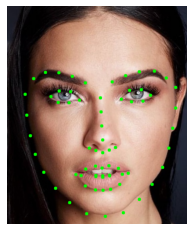

In [40]:
# detector detect les visage
# predictor predit les landmakrs
from imutils import face_utils

detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks.dat')
predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks_GTX.dat')
# bouche=np.array(list(range(30,36))+list(range(48,68)))
bouche=np.array(list(range(30,36))+list(range(48,68)))
# bouche=np.array(list(range(0,10)))

# image = cv2.imread(pim)
image=io.imread('/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w/pins_Adriana Lima/Adriana Lima0_0.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray=image

dots_size = 5
 
rects = detector(gray, 1)
# loop over the face detections
for (i, rect) in enumerate(rects):
    print(rect)
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array

    shape = predictor(gray, rect)

    # shape = face_utils.shape_to_np(shape)
    # shape = face_utils.shape_to_np(shape)[bouche]
    shape = face_utils.shape_to_np(shape)

 
    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    # (x, y, w, h) = face_utils.rect_to_bb(rect)
    # cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

 
    # show the face number
    # cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
    #     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
 
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    # for (x, y) in shape:
    #     cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)



    for mark,(x, y) in enumerate(shape):
        if mark in bouche:
            cv2.circle(image, (x, y), dots_size, (0, 0, 255), -1)
        else:
            cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)
    
    for (x,y) in shape:
        cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)

    
plt.axis('off')
plt.imshow(image)
plt.savefig('/home/xeowhyx/projet/3.png')

61,95 -- 370,405
[(82, 112) (349, 379)]


<Figure size 4320x720 with 0 Axes>

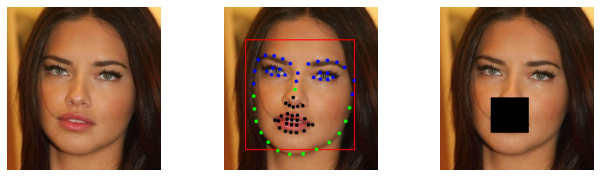

In [38]:
# ------------------------------- POUR PRESENTATION NON OPTI
from imutils import face_utils


# predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks.dat')
predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks_GTX.dat')

bouche=np.array(list(range(30,36))+list(range(48,68)))

detector = dlib.get_frontal_face_detector()

source=io.imread(pim)
# source=image_mask
image=source.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray=image


#########################
###################################  detecor sur grb
face_detector=dlib.get_frontal_face_detector()
# face_location=face_detector(im,1)

# coordonne des faces
dets = face_detector(image)

# si plusieurs face
for det in dets:
    cv2.rectangle( image, (det.left(), det.top()), (det.right(), det.bottom()) , (255,0,0), 2)
    print(f'{det.left()},{det.top()} -- {det.right()},{det.bottom()}')
###################################  detecor sur grb
#########################

dots_size = 5 
rects = detector(gray, 1)
# loop over the face detections

for (i, rect) in enumerate(rects):
    print(rect)
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array

    shape = predictor(gray, rect)

    shape = face_utils.shape_to_np(shape)
    
    # show the face number
    # cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
    #     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    for mark,(x, y) in enumerate(shape):
        if mark in bouche:
            cv2.circle(image, (x, y), dots_size, (0, 0, 0), -1)
        elif mark in yeux:
            cv2.circle(image, (x, y), dots_size, (0, 0, 255), -1)
        else:
            cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)
        
    
    # for (x,y) in shape:
    #     cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)


#########################
###################################  creation masque

a=np.min(shape[bouche][:,0])
b=np.max(shape[bouche][:,0])
c=np.min(shape[bouche][:,1])
d=np.max(shape[bouche][:,1])
image_mask=source.copy()

cv2.rectangle( image_mask, (a, c), (b, d) , (0,0,0), -1)
# plt.imshow(image)
# affiche(source, im, im2)
from matplotlib.pyplot import figure
figure(figsize=(60,10))

affiche(source, image, image_mask)

In [29]:
yeux=np.array([0,1]+list(range(15,29))+list(range(36,48)))


# autre dataset full mask
## ajout de vrais masque

In [6]:
mk='/media/xeowhyx/_w10_/Users/DAVID/dl/dataset_face/mask.png'
path='/media/xeowhyx/_w10_/Users/DAVID/dl/dataset_face/w'
mask_source=io.imread(mk)
wk='/media/xeowhyx/_w10_/Users/DAVID/dl/dataset_face/w'
# wk_masque='/media/xeowhyx/_w10_/Users/DAVID/dl/dataset_face/ww'
wk_masque='/media/xeowhyx/_w10_/Users/DAVID/dl/dataset_face/www'

In [66]:
# classes=os.listdir(wk)[5:]
# classes=os.listdir(wk)[:1]
classes=os.listdir(wk)[:3]
classes

['pins_Adriana Lima', 'pins_Alex Lawther', 'pins_Alexandra Daddario']

In [71]:
# get current dossier
# classes=os.listdir(wk)
# images=[]
limit=4
# k=-1

from tqdm import tqdm
bug=[]
# init
for classe in tqdm(classes):
	# print('---------------------',classe)
	if os.path.exists(wk_masque+'/'+classe): shutil.rmtree(wk_masque+'/'+classe)
	os.mkdir(wk_masque+'/'+classe)


	fichiers=os.listdir(wk+'/'+classe)
	
	for ele in tqdm(fichiers,leave=False):

		im=io.imread(wk+'/'+classe+'/'+ele)

		try:
			im,crit=incline_centralise(im)
		except UnboundLocalError:
			# print('ele')
			bug.append(ele)
			continue
		
		# print(f'crit={crit}')
		# cv2.imwrite(wk_masque+'/'+classe+'/'+ele,cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
		add_masque(
			output=wk_masque+'/'+classe+'/'+ele,
			source=im,
			critique=crit)

		# if i==1: print(ele)
		

100%|██████████| 3/3 [02:18<00:00, 46.11s/it]


['Adriana Lima170_71x.jpg',
 'Adriana Lima200_102x.jpg',
 'Adriana Lima30_153.jpg']

In [61]:

# pim='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w/pins_Adriana Lima/Adriana Lima0_0.jpg'
pim='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w/pins_Adriana Lima/Adriana Lima1_1.jpg'
# pim='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w/pins_Adriana Lima/Adriana Lima3_152.jpg'

# predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks.dat')
predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks_GTX.dat')
detector = dlib.get_frontal_face_detector()

# def add_masque(output,target,critique):
def add_masque(output,source,critique):
    '''
    ajout de masque au niveau du visage de la personne
    -------------------
    1: le masque n'a pas pu être ajouté
    '''

    # source=io.imread(target)


    # # le laisser en ram
    # gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)


    # #########################
    # ###################################  detecor sur grb
    # face_detector=dlib.get_frontal_face_detector()

    # # coordonne des faces
    # dets = face_detector(source)

    # # si plusieurs face
    # # for det in dets:
    # #     cv2.rectangle( image, (det.left(), det.top()), (det.right(), det.bottom()) , (255,0,0), 2)
    # #     print(f'{det.left()},{det.top()} -- {det.right()},{det.bottom()}')

    # ###################################  detecor sur grb
    # #########################

    # # dots_size = 5 
    # rects = detector(gray, 1)

    # # pt critique pour chaque face
    # for (i, rect) in enumerate(rects):
    #     shape = predictor(gray, rect)
    #     shape = face_utils.shape_to_np(shape)
        

    # try:
    #     x=shape[2][0]
    # except UnboundLocalError:
    #     return 1
    # xx=shape[14][0]
    # y=shape[2][1]
    # yy=shape[14][1]
    # utilisation de 4 pts critique, 2 8 14 29
    x,xx,y,yy,a,b=critique
    # my=min(y,yy,shape[29][1])
    # hauteur=shape[8][1]-my
    my=min(y,yy,b)
    hauteur=a-my

    # ajustement precis du futur masque
    y_marge_sup=int(round(hauteur*0.12))

    y_marge_inf=int(round(hauteur*0.01))

    # cv2.rectangle( image2, (x, my-y_marge_sup), (xx, my+hauteur+y_marge_inf) , (0,0,0), 3)
    # plt.imshow(image2)


    # forgrund est le masque que l'on colle pas dessur le background
    # background est la parti du visage qui va recevoir le masque

    try:
        background=source[my-y_marge_sup:my+hauteur+y_marge_inf,x:xx,:]
        foreground=cv2.resize(mask_source,(background.shape[1],background.shape[0]),interpolation = cv2.INTER_AREA)
    except cv2.error:
        return 1


    # init a 255
    alpha=np.full(shape=(background.shape[0],background.shape[1],1),fill_value=(255))
    # add le channel alpha au background
    background=np.concatenate((background,alpha),axis=2)


    alpha_background = background[:,:,3] / 255.0
    alpha_foreground = foreground[:,:,3] / 255.0


    # set adjusted colors
    for color in range(0, 3):
        background[:,:,color] = alpha_foreground * foreground[:,:,color] + \
            alpha_background * background[:,:,color] * (1 - alpha_foreground)

    # set adjusted alpha and denormalize back to 0-255
    # background[:,:,3] = (1 - (1 - alpha_foreground) * (1 - alpha_background)) * 255

    # display the image
    # plt.imshow(background)



    # source2=source.copy()
    source[my-y_marge_sup:my+hauteur+y_marge_inf,x:xx,:]=background[:,:,:3]

    # plt.imshow(source2)
    cv2.imwrite(output,cv2.cvtColor(source, cv2.COLOR_BGR2RGB))


    # affiche_2(source,source2)


In [64]:
def incline_centralise(source):
# def incline_centralise(output=0,target=0):
    '''
    incline et centralise la face
    -------------------
    1: err
    '''
    
    # source=io.imread(target)

    # le laisser en ram
    gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)


    #########################
    ###################################  detecor sur grb
    face_detector=dlib.get_frontal_face_detector()

    # coordonne des faces
    dets = face_detector(source)

    # si plusieurs face
    # for det in dets:
    #     cv2.rectangle( image, (det.left(), det.top()), (det.right(), det.bottom()) , (255,0,0), 2)
    #     print(f'{det.left()},{det.top()} -- {det.right()},{det.bottom()}')

    ###################################  detecor sur grb
    #########################

    # dots_size = 5 
    rects = detector(gray, 1)

    # pt critique pour chaque face
    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)



    # try:
    oeil_gauche=shape[36]
    oeil_droit=shape[45]
    # except UnboundLocalError:
        # return 1

    # utilisation de 4 pts critique pour le masque, 2 8 14 29
    # utilisation de 2 pts pour les oeils


    # vector_1=[oeil_droit[0]-oeil_gauche[0],oeil_droit[1]-oeil_gauche[1]]
    vector_1=[oeil_droit[0]-oeil_gauche[0],oeil_droit[1]-oeil_gauche[1]]
    vector_2=[0,1]

    #incline
    unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
    unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product)

    source = ndimage.rotate(source, math.degrees(dot_product))
    # return source,0

    # return source,0
    # centrale
    dets = face_detector(source)
    grayy = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
    rects = detector(grayy, 1)


    # pt critique pour chaque face
    for (i, rect) in enumerate(rects):
        shape = predictor(grayy, rect)
        shape = face_utils.shape_to_np(shape)

        for mark,(x, y) in enumerate(shape):
            if mark==27:
                # entre 2 yeux
                # cv2.circle(source, (x, y), 3, (255, 0, 0), -1)
                pivot=x,y
    

    
    center=math.floor(source.shape[0]/2),math.floor(source.shape[1]/2)

    # return source,0
    # je mets rouge puis je translate puis je mets vert
    
    # pivot=shape[29]
    # pivot=shape[27]

    # change rien
    # T = np.float32([[1, 0, 0 ], [0, 1,0 ]])
    
    

    # si positif alors gauche, sinon droite
    padding_latteral=-(pivot[0]-center[0])
    # si positif alors haut sinon bas
    padding_frontal=-(pivot[1]-center[1])
    # padding_latteral=-34
    # padding_frontal=133
    # print(padding_latteral,padding_frontal)

    
    T = np.float32([[1, 0, padding_latteral ], [0, 1, padding_frontal ]])
    source = cv2.warpAffine(source, T, (source.shape[1],source.shape[0]))
    # -133
    # 34

    center=math.floor(source.shape[0]/2),math.floor(source.shape[1]/2)
    # cv2.circle(source, center, 4, (255, 255, 0), -1)

    # return source,0


    start_dec=0,0
    end_dec=source.shape[1],source.shape[0]
    start_crois=source.shape[1],0
    end_crois=0,source.shape[0]

    # cv2.line(source, start_dec, end_dec, (255,0,255), thickness=1)
    # cv2.line(source, start_crois, end_crois, (255,0,255), thickness=1)
    # cv2.circle(source, pivot, 4, (0, 255, 0), -1)
    
    # print(pivot)

    x=shape[2][0]+padding_latteral
    xx=shape[14][0]+padding_latteral
    y=shape[2][1]+padding_frontal
    yy=shape[14][1]+padding_frontal

    return source,[x,xx,y,yy,shape[8][1]+padding_frontal,shape[29][1]+padding_frontal]

    # return padding_latteral,padding_frontal

    # utilisation de 4 pts critique, 2 8 14 29

In [14]:
# base='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/www/'
tg='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/www/source.png'
crit=incline_centralise(output=0,target=tg)

add_masque(output='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/www/mk.png',target='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/www/rotate.png',critique=crit)

-15
-33


In [8]:
print(foreground.shape)
print(mkr.shape)
print(background.shape)

(138, 199, 4)
(123, 199, 4)
(138, 199, 4)


In [ ]:


x=shape[2][0]
xx=shape[14][0]
y=shape[2][1]
yy=shape[14][1]

# hauteur=shape[9][1]-shape[29][1]


# my=max(y,yy,shape[29][1])
my=min(y,yy,shape[29][1])

hauteur=shape[8][1]-my


# droite=shape[15]

# image2=image.copy()
image2=source.copy()

y_marge_sup=int(round(hauteur*0.12))
y_marge_inf=int(round(hauteur*0.01))


cv2.rectangle( image2, (x, my-y_marge_sup), (xx, my+hauteur+y_marge_inf) , (0,0,0), 3)

# cv2.rectangle( image2, (x, y-marge_haute), (xx, yy+hauteur+10) , (0,0,0), 3)
# plt.imshow(mkr)

# plt.imshow(image2)

mk='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/mask.png'
mk=io.imread(mk)

mkr = cv2.resize(mk, (xx-x,hauteur+y_marge_inf), interpolation = cv2.INTER_AREA)







# b=io.imread(pim)[my-y_marge_sup:yy+hauteur+y_marge_inf,x:xx,:]
# b=io.imread(pim)[my-y_marge_sup:my+hauteur+y_marge_inf,x:xx,:]


In [ ]:
sub=image2[my-y_marge_sup:yy+hauteur+y_marge_inf,x:xx,:]
plt.imshow(sub)
sub.shape

In [ ]:
plt.imshow(image2)

In [ ]:
# background[0][0]
background.shape
b=background

# init a 255
alpha=np.full(shape=(668,550,1),fill_value=(255))
print(f'b={b.shape}')
print(f'alpha={alpha.shape}')
# b=background[:,alpha]
# tmp=np.append(b,alpha,axis=2)
# tmp=np.stack(b,alpha,axis=3)

# add la a du rgba a 255
tmp=np.concatenate((b,alpha),axis=2)
tmp.shape

In [ ]:
# b=io.imread(pim)[my-y_marge_sup:yy+hauteur+y_marge_inf,x:xx,:]
b=io.imread(pim)[my-y_marge_sup:my+hauteur+y_marge_inf,x:xx,:]

# b=background
# b=[y-30:yy+hauteur+10,x:xx,:]

# sub=image2[my-y_marge_sup:yy+hauteur+y_marge_inf,x:xx,:]

# init a 255
alpha=np.full(shape=(b.shape[0],b.shape[1],1),fill_value=(255))
print(f'b={b.shape}')
print(f'alpha={alpha.shape}')

# add la a du rgba a 255
del background
background=np.concatenate((b,alpha),axis=2)

In [ ]:
mk='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/mask.png'
mkr=io.imread(mk)
# plt.imshow(mkr)

In [ ]:
# plt.imshow(mkrr)
mkrr=mkr.copy()
print(mkrr.shape)
# transparent=mkrr[:,:,3]<18
# print(transparent.shape)
# print(mkrr.shape)

# mkrr[mkrr[:,:,3]<18]=mkrr[:,:,3]
# mkrr



a,mkrr=cv2.threshold(mkrr[:, :, 3], 0, 255, cv2.THRESH_BINARY)
mkrr.shape 
mkrr[0]


# mkrr[transparent]=[:,:,3]

In [ ]:
mkrr=mkr.copy()

foreground=cv2.resize(mkrr,(b.shape[1],b.shape[0]),interpolation = cv2.INTER_AREA)
# 283, 435, 3

# background=tmp.copy()[y-30:yy+hauteur+10,x:xx,:]
# foreground=mkrr

# normalize alpha channels from 0-255 to 0-1
alpha_background = background[:,:,3] / 255.0
# alpha_background=background[y-30:yy+hauteur+10,x:xx,3]/255.0
# print(alpha_background.shape)
alpha_foreground = foreground[:,:,3] / 255.0



# mskr if 17 ou moins alors 0, sinon 255


# set adjusted colors
for color in range(0, 3):
    background[:,:,color] = alpha_foreground * foreground[:,:,color] + \
        alpha_background * background[:,:,color] * (1 - alpha_foreground)

# set adjusted alpha and denormalize back to 0-255
# background[:,:,3] = (1 - (1 - alpha_foreground) * (1 - alpha_background)) * 255

# display the image
plt.imshow(background)


In [ ]:
source2=source.copy()
# source2[my-y_marge_sup:yy+hauteur+y_marge_inf,x:xx,:]=background[:,:,:3]
source2[my-y_marge_sup:my+hauteur+y_marge_inf,x:xx,:]=background[:,:,:3]
plt.imshow(source2)
cv2.imwrite('/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/source2.png', cv2.cvtColor(source2, cv2.COLOR_BGR2RGB))



In [ ]:
# background = cv2.imread("background.png", cv2.IMREAD_UNCHANGED)
# foreground = cv2.imread("overlay.png", cv2.IMREAD_UNCHANGED)


mkrr=mkr.copy()
# mkrr=cv2.resize(mkrr,(550,668),interpolation = cv2.INTER_AREA)

mkrr=cv2.resize(mkrr,(435,283),interpolation = cv2.INTER_AREA)

# 283, 435, 3

background=tmp.copy()[y-30:yy+hauteur+10,x:xx,:]
foreground=mkrr

# normalize alpha channels from 0-255 to 0-1
alpha_background = background[:,:,3] / 255.0
# alpha_background=background[y-30:yy+hauteur+10,x:xx,3]/255.0
# print(alpha_background.shape)
alpha_foreground = foreground[:,:,3] / 255.0

# set adjusted colors
for color in range(0, 3):
    background[:,:,color] = alpha_foreground * foreground[:,:,color] + \
        alpha_background * background[:,:,color] * (1 - alpha_foreground)

# set adjusted alpha and denormalize back to 0-255
background[:,:,3] = (1 - (1 - alpha_foreground) * (1 - alpha_background)) * 255

# display the image
plt.imshow(background)


In [ ]:
# touche po


mkrr=mkr.copy()
mkrr=cv2.resize(mkrr,(550,668),interpolation = cv2.INTER_AREA)

# mkrr=cv2.resize(mkrr,(283, 435),interpolation = cv2.INTER_AREA)
# 283, 435, 3

background=tmp.copy()
foreground=mkrr

# normalize alpha channels from 0-255 to 0-1
alpha_background = background[:,:,3] / 255.0
# alpha_background=background[y-30:yy+hauteur+10,x:xx,3]/255.0
# print(alpha_background.shape)
alpha_foreground = foreground[:,:,3] / 255.0

# set adjusted colors
for color in range(0, 3):
    background[:,:,color] = alpha_foreground * foreground[:,:,color] + \
        alpha_background * background[:,:,color] * (1 - alpha_foreground)

# set adjusted alpha and denormalize back to 0-255
background[:,:,3] = (1 - (1 - alpha_foreground) * (1 - alpha_background)) * 255

# display the image
plt.imshow(background)


In [ ]:
background=tmp.copy()
# background=background[y-30:yy+hauteur+10,x:xx,3]
caca=background[y-30:yy+hauteur+10,x:xx,:]
plt.imshow(caca)
caca.shape

In [ ]:
mkrr=mkr.copy()
mkrr=cv2.resize(mkrr,(668,550),interpolation = cv2.INTER_AREA)

mkrr.shape

In [ ]:
k=-1
for ele in t:
    k+=1
    print(ele)
    if k==5: break


## center

In [4]:
mk='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/mask.png'
path='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w'
mask_source=io.imread(mk)
wk='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w'
wk_masque='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/ww'

# target='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w/pins_Adrianama'
target='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w/pins_Adriana Lima/Adriana Lima19_92.jpg'

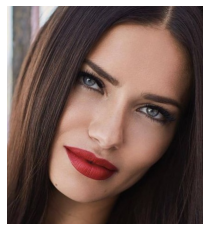

In [5]:
# affiche(source, image, image_mask)

im=io.imread(target)
plt.axis('off')
plt.imshow(im)

18,66 -- 233,281
[(18, 68) (241, 291)]
(0, 182) (350, 182)


<Figure size 4320x720 with 0 Axes>

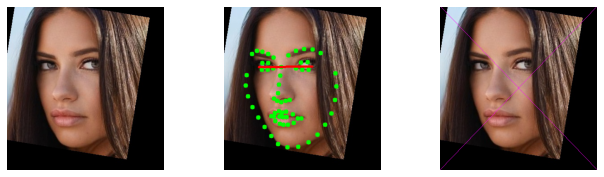

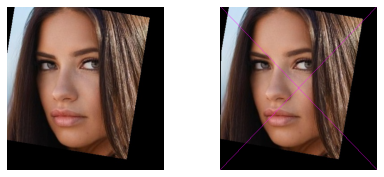

In [67]:
# ------------------------------- POUR PRESENTATION NON OPTI CENTRALISATION
from imutils import face_utils


# predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks.dat')
predictor= dlib.shape_predictor('/home/xeowhyx/projet/w10/dataset/face/shape_predictor_68_face_landmarks_GTX.dat')

detector = dlib.get_frontal_face_detector()

source=io.imread(target)
# source=image_mask
image=source.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray=image


#########################
###################################  detecor sur grb
face_detector=dlib.get_frontal_face_detector()
# face_location=face_detector(im,1)

# coordonne des faces
dets = face_detector(image)

# si plusieurs face
for det in dets:
    # cv2.rectangle( image, (det.left(), det.top()), (det.right(), det.bottom()) , (255,0,0), 2)
    print(f'{det.left()},{det.top()} -- {det.right()},{det.bottom()}')
###################################  detecor sur grb
#########################

dots_size = 5 
rects = detector(gray, 1)
# loop over the face detections

for (i, rect) in enumerate(rects):
    print(rect)
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array

    shape = predictor(gray, rect)

    shape = face_utils.shape_to_np(shape)
    
    eyes=[]
    for mark,(x, y) in enumerate(shape):

        if mark==36 or mark==45:
            eyes.append((x,y))
        # if mark in bouche:
        #     cv2.circle(image, (x, y), dots_size, (0, 0, 0), -1)
        # elif mark in yeux:
        #     cv2.circle(image, (x, y), dots_size, (0, 0, 255), -1)
        # else:
        #     cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)

        # if mark == 29:
        #     cv2.circle(image, (x, y), dots_size, (255, 0, 0), -1)
        #     pivot=x,y
        else:
            cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)
        

    


#########################
###################################  creation masque

cv2.line(image, eyes[0], eyes[1], (255,0,0), thickness=3) 

image_pivot=source.copy()

# cv2.rectangle( image_pivot, (a, c), (b, d) , (0,0,0), -1)

start_vertical=0,math.floor(image_pivot.shape[0]/2)
end_vertical=image_pivot.shape[1],math.floor(image_pivot.shape[0]/2)

start_horizontal=math.floor(image_pivot.shape[1]/2),0
end_horizontal=math.floor(image_pivot.shape[1]/2),image_pivot.shape[0]



print(start_vertical,end_vertical)

start_dec=0,0
end_dec=image_pivot.shape[1],image_pivot.shape[0]

# start_crois=image_pivot.shape[0],image_pivot.shape[1]
# end_crois=0,image_pivot.shape[1]
start_crois=image_pivot.shape[1],0
end_crois=0,image_pivot.shape[0]

# cv2.line(image_pivot, start_vertical, end_vertical, (0,0,255), thickness=1) 
# cv2.line(image_pivot, start_horizontal, end_horizontal, (0,0,255), thickness=1) 


cv2.line(image_pivot, start_dec, end_dec, (255,0,255), thickness=1)
cv2.line(image_pivot, start_crois, end_crois, (255,0,255), thickness=1)


# plt.imshow(image)
# affiche(source, im, im2)





figure(figsize=(60,10))

affiche(source, image, image_pivot)



vector_1=[eyes[1][0]-eyes[0][0],eyes[1][1]-eyes[0][1]]
vector_2=[0,1]

# image_pivot.shape
image_pivot2=source.copy()

# cv2.line(image_pivot2, eyes[0], eyes[1], (255,0,255), thickness=1)

# plt.imshow(image_pivot2)

unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle = np.arccos(dot_product)

# angle
# dot_product



rotated = ndimage.rotate(image_pivot2, math.degrees(dot_product))
start_dec=0,0
end_dec=rotated.shape[1],rotated.shape[0]
start_crois=rotated.shape[1],0
end_crois=0,rotated.shape[0]
cv2.line(rotated, start_dec, end_dec, (255,0,255), thickness=1)
cv2.line(rotated, start_crois, end_crois, (255,0,255), thickness=1)
affiche_2(source,rotated)

In [66]:
target='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w3/Adriana Lima9_204.jpg'
target='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w3/Adriana Lima20_101.jpg'
# target='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/w3/Adriana Lima144_46.jpg'

In [170]:
cv2.imwrite('/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/www/source.png',cv2.cvtColor(source, cv2.COLOR_BGR2RGB))

True

In [169]:
oo='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/www/1.png'
add_masque(oo,'/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/www/2.png')

In [19]:
image_pivot.shape

(463, 417, 3)

In [60]:
T

array([[ 1.,  0., 16.],
       [ 0.,  1., 30.]], dtype=float32)

pivot=(224, 261)
center=(208, 231)


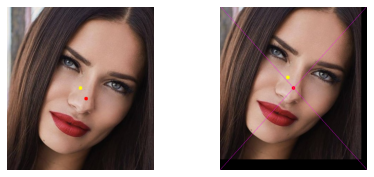

In [116]:
image_pivot2=source.copy()
img_translation=source.copy()

center=math.floor(image_pivot2.shape[1]/2),math.floor(image_pivot2.shape[0]/2)
print(f'pivot={pivot}\ncenter={center}')

cv2.circle(image_pivot2, pivot, dots_size, (255, 0, 0), -1)
cv2.circle(image_pivot2, center, dots_size, (255, 255, 0), -1)
# plt.imshow(image_pivot2)

# cv2.line(image_pivot2, start_dec, end_dec, (255,0,255), thickness=1)
# cv2.line(image_pivot2, start_crois, end_crois, (255,0,255), thickness=1)




# T = np.float32([[1, 0, abs(center[0]-pivot[0])], [0, 1, abs(center[1]-pivot[1])]])

# T = np.float32([[1, 0, abs(center[0]-pivot[0])], [0, 1, abs(center[1]-pivot[1])]])
# T = np.float32([[1, 0, abs(center[1]-pivot[1])], [0, 1,abs(center[0]-pivot[0]) ]])
# T = np.float32([[1, 0, abs(center[1]-pivot[1])], [0, 1,abs(center[0]-pivot[0]) ]])
# img_translation = cv2.warpAffine(image_pivot2, T, (image_pivot2.shape[1],image_pivot2.shape[0]))



# change rien
# T = np.float32([[1, 0, 0 ], [0, 1,0 ]])

padding_latteral=-abs(center[0]-pivot[0])
padding_frontal=-abs(center[1]-pivot[1])
T = np.float32([[1, 0, padding_latteral ], [0, 1,padding_frontal ]])
img_translation = cv2.warpAffine(image_pivot2, T, (image_pivot2.shape[1],image_pivot2.shape[0]))

cv2.line(img_translation, start_dec, end_dec, (255,0,255), thickness=1)
cv2.line(img_translation, start_crois, end_crois, (255,0,255), thickness=1)

# plt.imshow(img_translation)
affiche_2(image_pivot2,img_translation)

# quarter_height, quarter_width = height / 4, width / 4
# T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

In [104]:
(img_translation==image_pivot2).all()

True

In [91]:
print(f'img_translation={img_translation.shape}')
print(f'img_pivot={image_pivot2.shape}')

img_translation=(463, 417, 3)
img_pivot=(463, 417, 3)


# pivot

In [126]:
eyes

[(155, 155), (334, 234)]

In [146]:
vector_1=[eyes[1][0]-eyes[0][0],eyes[1][1]-eyes[0][1]]
vector_2=[0,1]

# vector_1 = [0, 1]
# vector_2 = [1, 0]


In [161]:
start_horizontal

(208, 0)

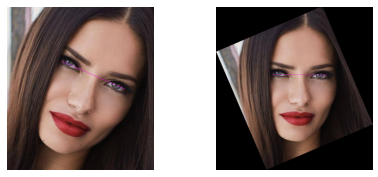

In [151]:
# image_pivot.shape
image_pivot2=source.copy()

cv2.line(image_pivot2, eyes[0], eyes[1], (255,0,255), thickness=1)

# plt.imshow(image_pivot2)

unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle = np.arccos(dot_product)

# angle
# dot_product

from scipy import ndimage

#rotation angle in degree
# rotated = ndimage.rotate(image_pivot2, math.degrees(angle))
rotated = ndimage.rotate(image_pivot2, math.degrees(dot_product))

affiche_2(image_pivot2,rotated)


In [155]:
# padding_latteral


-30

In [152]:
rotated.shape

(590, 565, 3)

In [153]:
image_pivot2.shape

(463, 417, 3)

In [8]:
# image_pivot.shape

import math
math.floor(208)


# math.floor(start_horizontal
image_pivot.shape




(463, 417, 3)

In [26]:
yeux=np.array([0,1]+list(range(15,29))+list(range(36,48)))


In [32]:
pivot

(224, 261)